In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine
#from pandas_profiling import ProfileReport
from matplotlib import ticker
sns.set_style('white')

# Graficas Refineria Shushufindi


In [3]:
#Autocompletador
%config Completer.use_jedi=False

In [4]:
engine=create_engine('sqlite:///CO2_EOR.db')

df=pd.read_sql_query("SELECT* FROM R_Shushufindi", engine)
df.head()
df.columns

Index(['Refineria', 'año', 'RefinacionBarriles', 'Emisiones_CO2'], dtype='object')

In [5]:
df

,Refineria,año,RefinacionBarriles,Emisiones_CO2
0,Shushufindi,2010,6357000,188587.5735
1,Shushufindi,2011,6555000,194461.4667
2,Shushufindi,2012,7165000,212557.8046
3,Shushufindi,2013,7097000,210540.5079
4,Shushufindi,2014,7241000,214812.4303
5,Shushufindi,2015,7077000,209947.1854
6,Shushufindi,2016,7400987,219558.6251
7,Shushufindi,2017,7553998,224097.8689
8,Shushufindi,2018,7460024,221310.0242
9,Shushufindi,2019,7033492,208656.4715


In [6]:
#df.set_index('año')

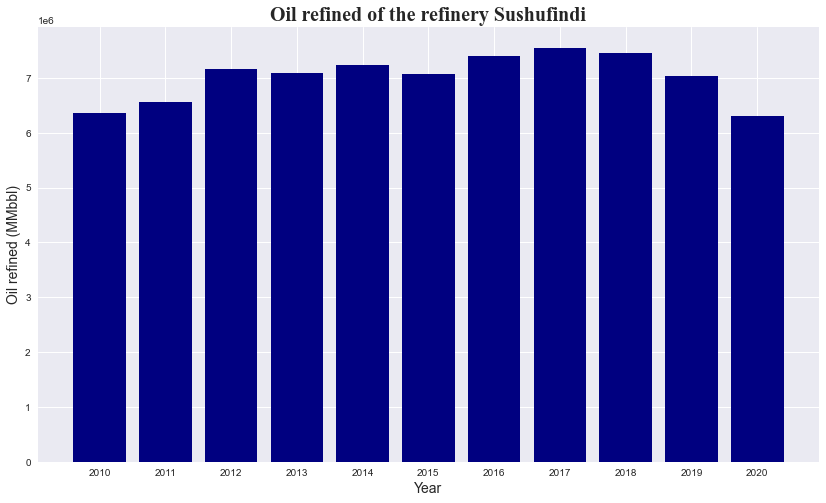

In [7]:
fig1, ax = plt.subplots(figsize=(14,8))

ax.bar(df['año'], df['RefinacionBarriles'], color='navy')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil refined (MMbbl)', fontsize=14)
#ax.set_xticks(ax.get_xticks())
ax.set_title('Oil refined of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.show()
#df.iloc[6:].set_index("año")["RefinacionBarriles"].plot(kind="bar",ylabel="Barriles Refinados",title="Producción anual de la refineria de Shushufindi")


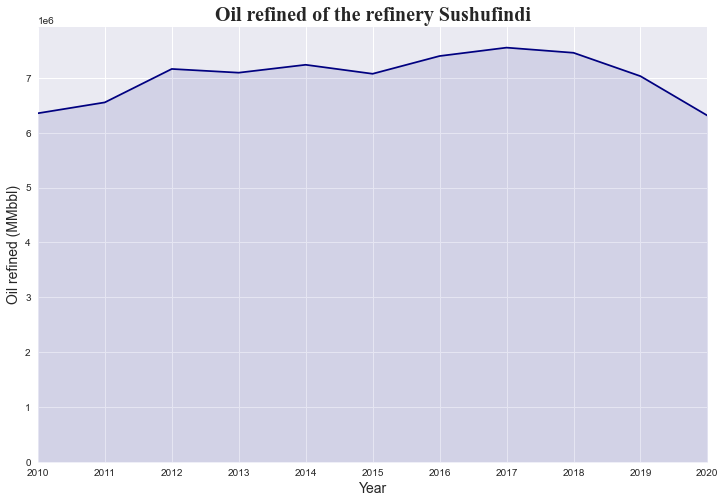

In [8]:
fig2 = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df, x='año', y='RefinacionBarriles', color='navy')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil refined (MMbbl)', fontsize=14)
ax.fill_between(df.año, df.RefinacionBarriles, alpha=0.1, color='navy')
ax.set_xlim(df.año.min(), df.año.max())
ax.set_ylim(0)
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.set_title('Oil refined of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

In [9]:
from matplotlib.ticker import AutoMinorLocator

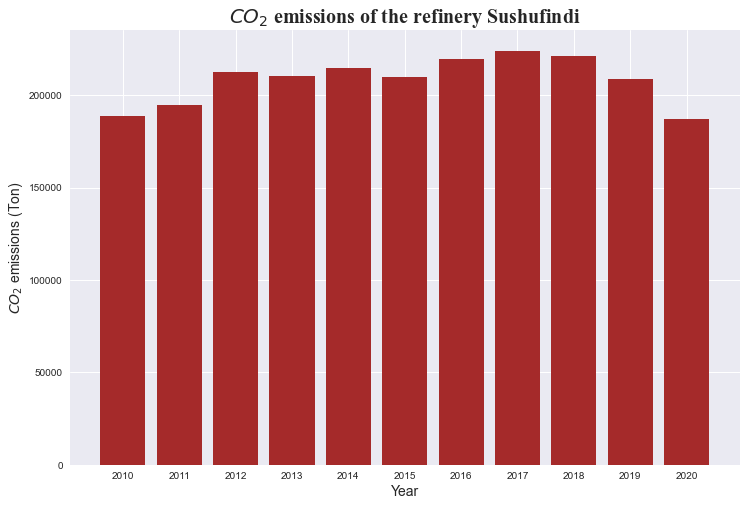

In [10]:
fig3, ax = plt.subplots(figsize=(12,8))

ax.bar(df['año'], df['Emisiones_CO2'], color='brown')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.set_title(r'$CO_{2}$ emissions of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()
#df.iloc[6:].set_index("año")['Emisiones_CO2'].plot(kind="bar",ylabel="Emisiones de CO2 |Ton|",title="Emisiones de CO2 de la refineria de Shushufindi",color=["orange"])


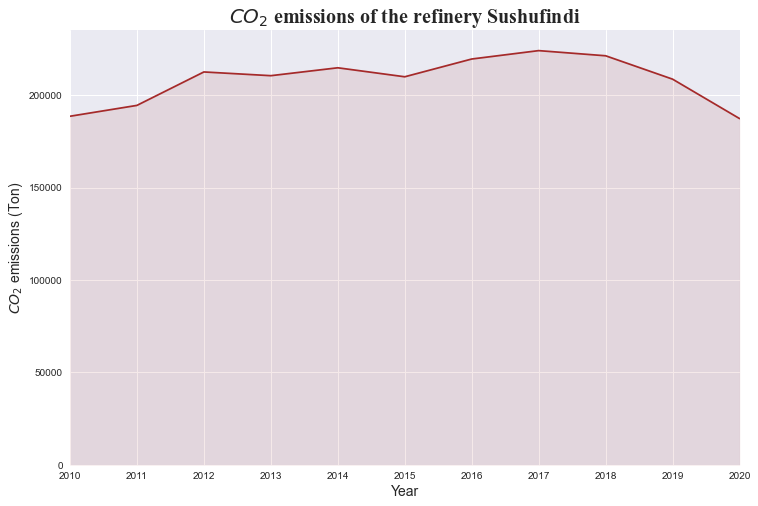

In [11]:
fig4 = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df, x='año', y='Emisiones_CO2', color='brown')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.fill_between(df.año, df.Emisiones_CO2, alpha=0.1, color='brown')
ax.set_xlim(df.año.min(), df.año.max())
ax.set_ylim(0)
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.set_title(r'$CO_{2}$ emissions of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

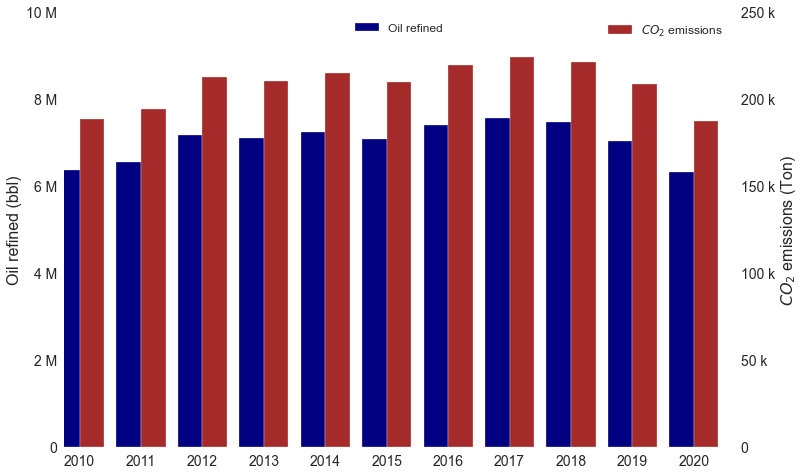

In [88]:
formatter = ticker.EngFormatter()
fig5 = plt.figure(figsize=(12,8), edgecolor='black')
ax1 = fig5.add_subplot()
ax2 = ax1.twinx()

ener = df.plot.bar(x='año', y='RefinacionBarriles', width=0.4, color='navy',
                                         ax=ax1, align='center', label='Oil refined', position=1)
emi = df.plot.bar(x='año', y='Emisiones_CO2', width=0.4, color='brown',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)

#ax1.bar(df['año'], df['RefinacionBarriles'], color='blue', label='Oil refined')
#ax2 = ax1.twinx()
#ax2.bar(df['año'], df['Emisiones_CO2'], color='orange', label='CO2 emissions')
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('Oil refined (bbl)', fontsize=16)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylim(0, 250E3)
ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
ax2.grid(visible=False)
ax1.tick_params(axis='x', labelrotation = 0)
ax1.set_ylim(0, 10E6)
#plt.title(r'Oil refined and $CO_{2}$ emissions of the refinery Sushufindi', fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#R_barras=df.iloc[6:].set_index("año").plot(kind="bar",stacked=True,title="Producción anual de la refineria de Shushufindi")

In [89]:
fig5.savefig('refinery')

# Graficas Termoelectricas

In [14]:
ter=pd.read_sql_query("SELECT* FROM Datos_termoelectricas", engine)
ter.head()


,Termoelectrica,año,EnergiaBruta(MWH),EmisionCO2[Ton]
0,Amazonas,2016,9568.65,8809.53
1,Amazonas,2017,9936.76,8749.89
2,Amazonas,2018,9962.33,8806.04
3,Amazonas,2019,10594.39,9661.34
4,Amazonas,2020,10571.86,9623.63


In [15]:
ter_ama = ter[ter['Termoelectrica']=='Amazonas']
ter_ama

,Termoelectrica,año,EnergiaBruta(MWH),EmisionCO2[Ton]
0,Amazonas,2016,9568.65,8809.53
1,Amazonas,2017,9936.76,8749.89
2,Amazonas,2018,9962.33,8806.04
3,Amazonas,2019,10594.39,9661.34
4,Amazonas,2020,10571.86,9623.63


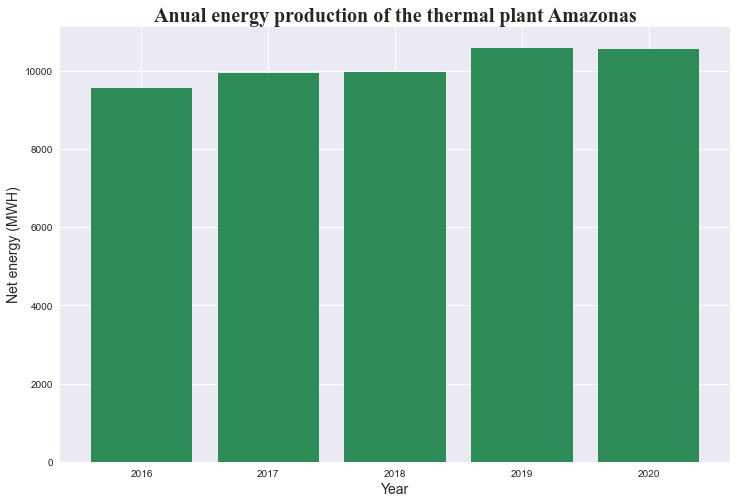

In [16]:
fig6, ax = plt.subplots(figsize=(12,8))

ax.bar(ter_ama['año'], ter_ama['EnergiaBruta(MWH)'], color='seagreen')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Net energy (MWH)', fontsize=14)
ax.set_title('Anual energy production of the thermal plant Amazonas',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#ter.iloc[:5].set_index("año")['EnergiaBruta(MWH)'].plot(kind="bar",ylabel="EnergiaBruta(MWH)",title="Producción anual de Energia de la central Térmica Amazonas",color=["green"])

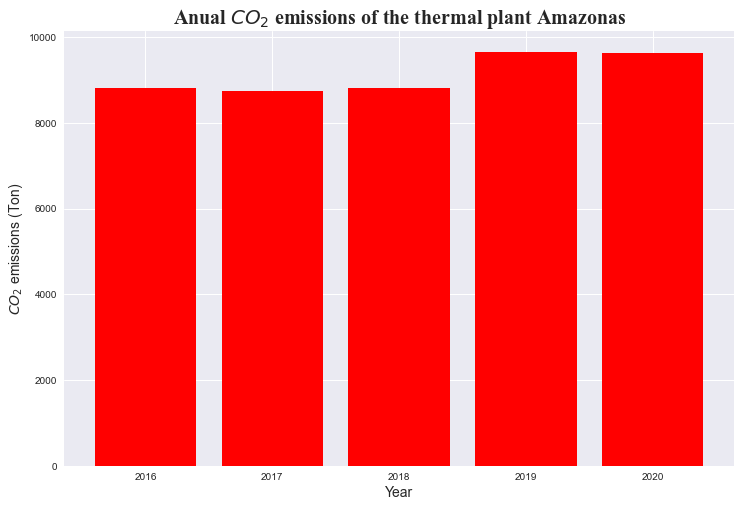

In [17]:
fig7, ax = plt.subplots(figsize=(12,8))

ax.bar(ter_ama['año'], ter_ama['EmisionCO2[Ton]'], color='red')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.set_title(r'Anual $CO_{2}$ emissions of the thermal plant Amazonas',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#ter.iloc[:5].set_index("año")['EmisionCO2[Ton]'].plot(kind="bar",ylabel="'EmisionCO2[Ton]'",title="Emisiones de CO2 anual de la central Térmica Amazonas",color=["red"])

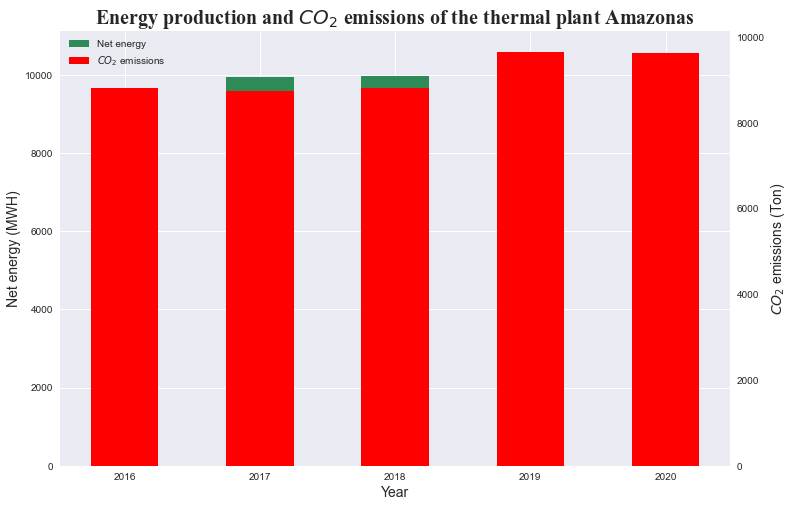

In [18]:
fig8, ax1 = plt.subplots(figsize=(12,8))

ener = ax1.bar(ter_ama['año'], ter_ama['EnergiaBruta(MWH)'], width=0.5, color='seagreen', align='center')
ax2 = ax1.twinx()
emi = ax2.bar(ter_ama['año'], ter_ama['EmisionCO2[Ton]'], width=0.5, color='red', align='center')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net energy (MWH)', fontsize=14)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax2.grid(visible=False)
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.legend([ener, emi], ['Net energy', r'$CO_{2}$ emissions'])
plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plant Amazonas',
          fontname="Times New Roman", size=20, fontweight="bold")
plt.show()

#ter.iloc[:5].set_index("año").plot(kind="bar",stacked=True,title="Producción anual de la la central Térmica Amazonas")

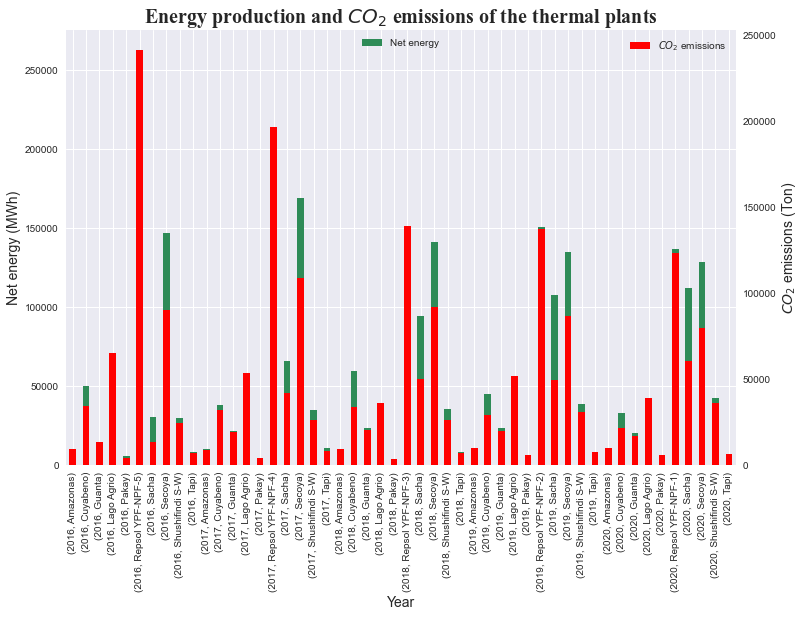

In [19]:
fig9 = plt.figure(figsize=(12,8), edgecolor='black')
ax1 = fig9.add_subplot()
ax2 = ax1.twinx()

ter.groupby(['año', 'Termoelectrica'])['EnergiaBruta(MWH)'].sum().plot(kind='bar', width=0.5, color='seagreen',
                                                                       ax=ax1, label='Net energy')
ter.groupby(['año', 'Termoelectrica'])['EmisionCO2[Ton]'].sum().plot(kind='bar', width=0.5, color='red',
                                                                     ax=ax2, label=r'$CO_{2}$ emissions')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net energy (MWh)', fontsize=14)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
ax2.grid(visible=False)
plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plants',
          fontname="Times New Roman", size=20, fontweight="bold")
plt.show()

In [20]:
#ter_ama = ter_ama.set_index('año')

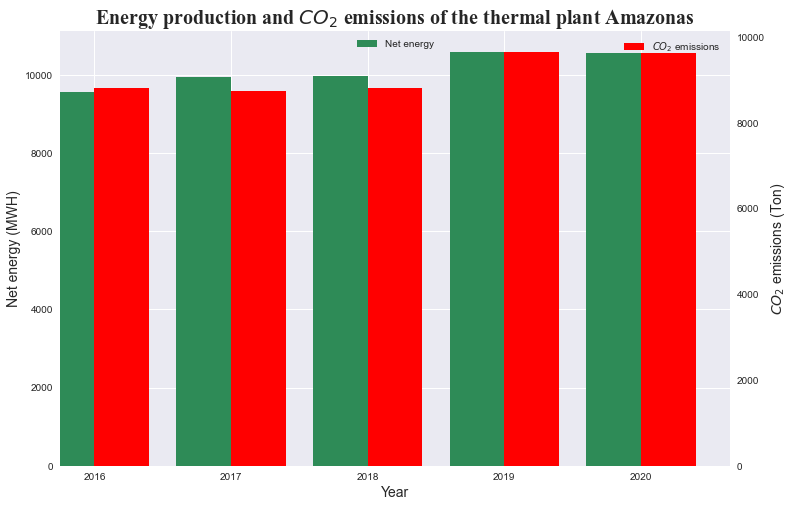

In [21]:
fig10 = plt.figure(figsize=(12,8), edgecolor='black')
ax1 = fig10.add_subplot()
ax2 = ax1.twinx()

ener = ter_ama.set_index('año')['EnergiaBruta(MWH)'].plot(kind='bar', width=0.4, color='seagreen',
                                         ax=ax1, align='center', label='Net energy', position=1)
emi = ter_ama.set_index('año')['EmisionCO2[Ton]'].plot(kind='bar', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net energy (MWH)', fontsize=14)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plant Amazonas',
          fontname="Times New Roman", size=20, fontweight="bold")
ax1.tick_params(axis='x', labelrotation = 0)
ax2.grid(visible=False)
plt.show()

In [22]:
fig10.savefig('thermal_plants')

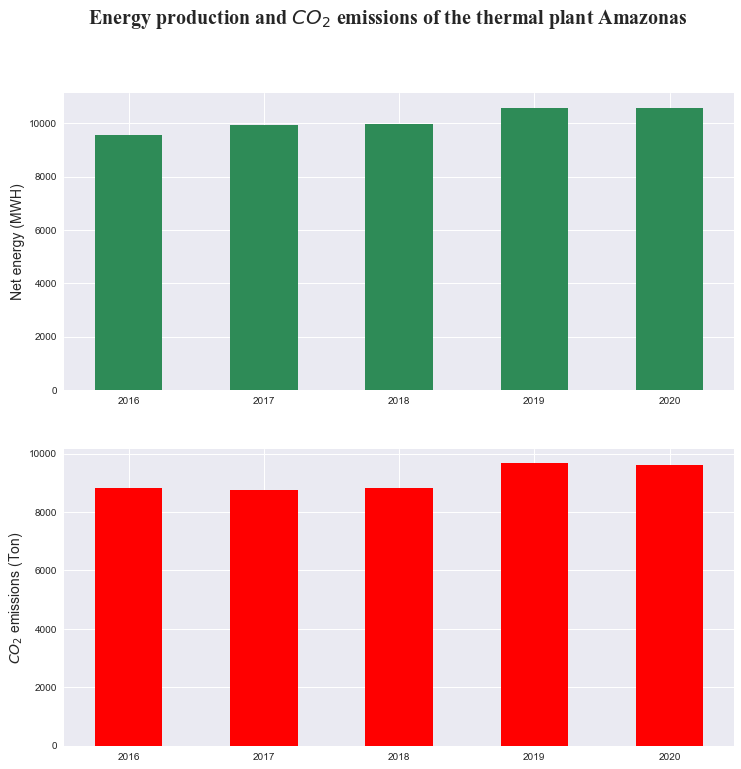

In [23]:
fig11, axes = plt.subplots(2, 1, figsize=(12,12))

axes[0].bar(ter_ama['año'], ter_ama['EnergiaBruta(MWH)'], width=0.5, color='seagreen', align='center')
axes[1].bar(ter_ama['año'], ter_ama['EmisionCO2[Ton]'], width=0.5, color='red', align='center')
#axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Net energy (MWH)', fontsize=14)
axes[1].set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
fig11.suptitle(r'Energy production and $CO_{2}$ emissions of the thermal plant Amazonas',
             fontname="Times New Roman", size=20, fontweight="bold")
plt.show()

# Secoya Thermal plant

In [24]:
ter_se = ter[ter['Termoelectrica']=='Secoya'].sort_values(by='año')
ter_se

,Termoelectrica,año,EnergiaBruta(MWH),EmisionCO2[Ton]
14,Secoya,2016,146407.44,90213.02
13,Secoya,2017,168637.32,108631.51
12,Secoya,2018,141009.27,91707.46
11,Secoya,2019,134811.21,86292.29
10,Secoya,2020,128031.47,79677.65


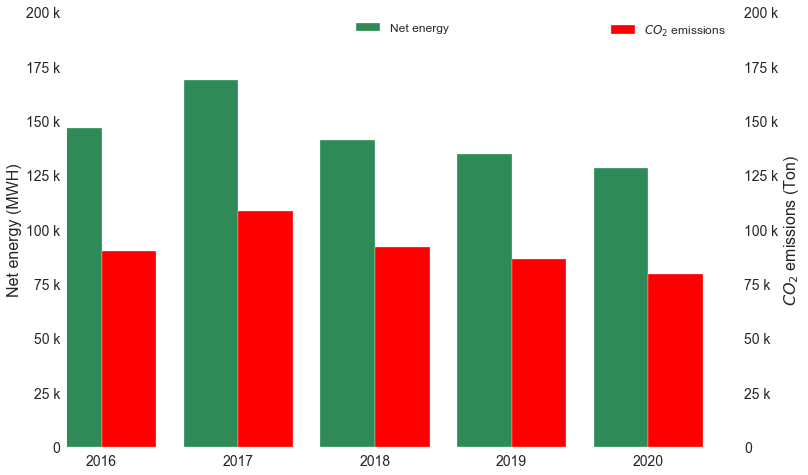

In [81]:
formatter = ticker.EngFormatter()
fig20 = plt.figure(figsize=(12,8), edgecolor='black')
ax1 = fig20.add_subplot()
ax2 = ax1.twinx()

ener = ter_se.set_index('año')['EnergiaBruta(MWH)'].plot(kind='bar', width=0.4, color='seagreen',
                                         ax=ax1, align='center', label='Net energy', position=1)
emi = ter_se.set_index('año')['EmisionCO2[Ton]'].plot(kind='bar', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('Net energy (MWH)', fontsize=16)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax1.set_ylim(0, 200E3)
ax2.set_ylim(0, 200E3)
ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
#plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plant Secoya',
#          fontname="Times New Roman", size=20, fontweight="bold")
ax1.tick_params(axis='x', labelrotation = 0)
ax2.grid(visible=False)
plt.show()

In [82]:
fig20.savefig('Secoya plant')

# PROMEDIO

In [27]:
terP=pd.read_sql_query("SELECT* FROM Termoelectricas_datos_promedio", engine)
terP.columns

Index(['Termoeléctrica', 'EnergiaBruta_MWH', 'Emision_TCO2'], dtype='object')

In [28]:
terP

,Termoeléctrica,EnergiaBruta_MWH,Emision_TCO2
0,Amazonas,10126.80,9130.08
1,Lago Agrio,44047.66,48842.12
2,Secoya,143779.34,91304.39
3,Guanta,20220.74,17707.28
4,Cuyabeno,44795.77,30056.88
5,Repsol YPF-NPF-1,179781.80,167496.74
6,Shushifindi_S-O,35926.79,28495.61
7,Tapi,8051.10,6896.12
8,Pakay,4573.52,4410.81
9,Sacha,81893.86,42855.12


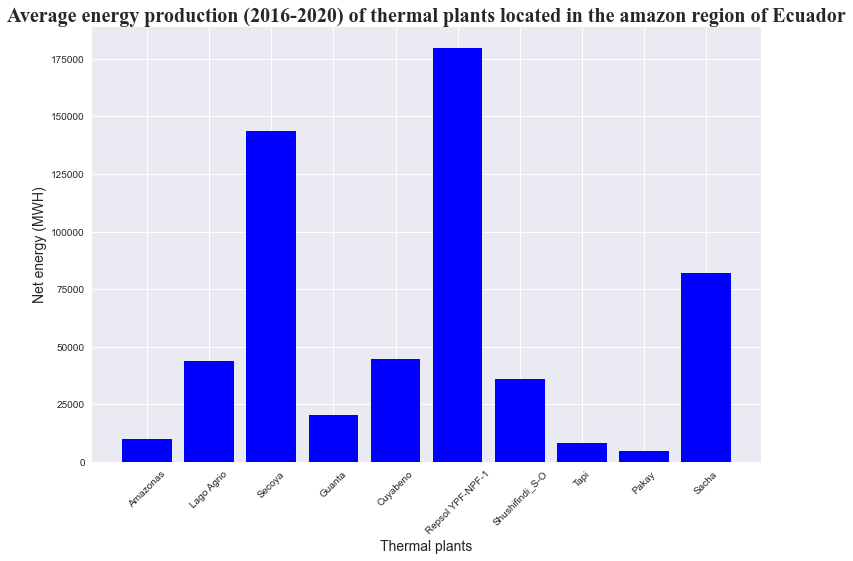

In [29]:
fig12, ax = plt.subplots(figsize=(12,8))

ax.bar(terP['Termoeléctrica'], terP['EnergiaBruta_MWH'], color='blue')
ax.set_xlabel('Thermal plants', fontsize=14)
ax.set_ylabel('Net energy (MWH)', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Average energy production (2016-2020) of thermal plants located in the amazon region of Ecuador',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#terP.set_index('Termoeléctrica')['EnergiaBruta_MWH'].plot(kind="bar",ylabel="EnergiaBruta(MWH)",title="Producción  de energia promedio (2016-2020) de las termoelécticas en la Amazonia Ecuatoriana",color=["blue"])

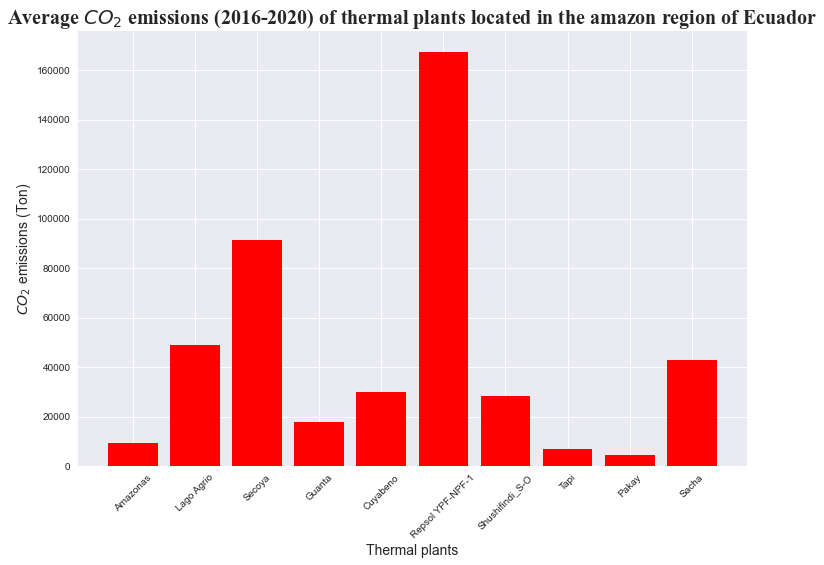

In [30]:
fig13, ax = plt.subplots(figsize=(12,8))

ax.bar(terP['Termoeléctrica'], terP['Emision_TCO2'], color='red')
ax.set_xlabel('Thermal plants', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
plt.xticks(rotation=45)
ax.set_title(r'Average $CO_{2}$ emissions (2016-2020) of thermal plants located in the amazon region of Ecuador',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#terP.set_index('Termoeléctrica')['Emision_TCO2'].plot(kind="bar",ylabel="Emision_TCO2",title="Emisiones de CO2 promedio (2016-2020)  de las termoelécticas en la Amazonia Ecuatoriana ",color=["red"])

In [31]:
terP

,Termoeléctrica,EnergiaBruta_MWH,Emision_TCO2
0,Amazonas,10126.80,9130.08
1,Lago Agrio,44047.66,48842.12
2,Secoya,143779.34,91304.39
3,Guanta,20220.74,17707.28
4,Cuyabeno,44795.77,30056.88
5,Repsol YPF-NPF-1,179781.80,167496.74
6,Shushifindi_S-O,35926.79,28495.61
7,Tapi,8051.10,6896.12
8,Pakay,4573.52,4410.81
9,Sacha,81893.86,42855.12


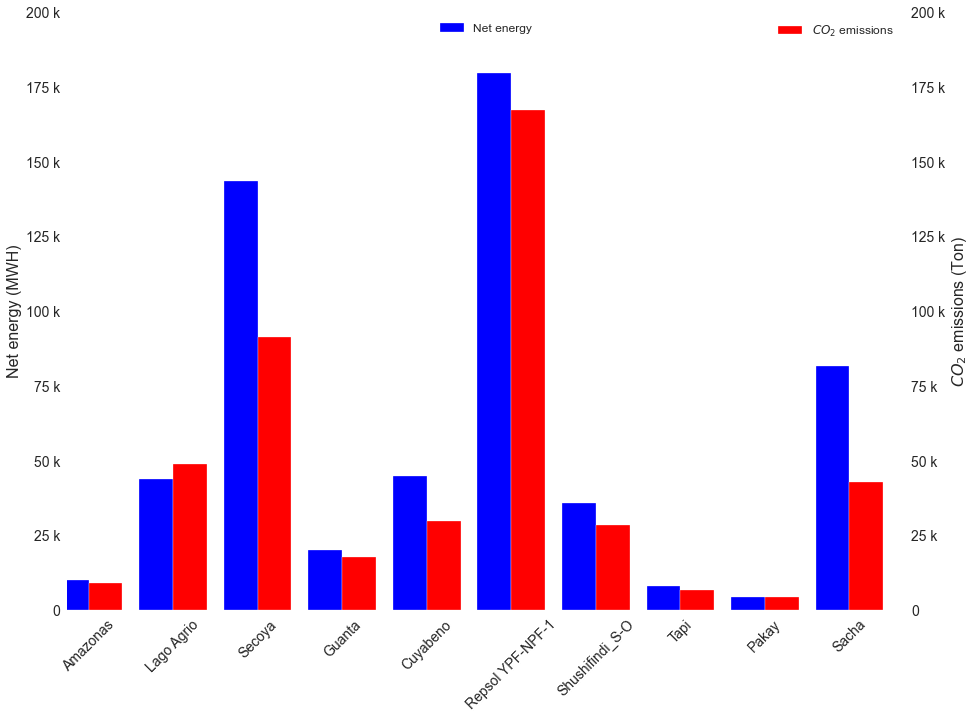

In [68]:
formatter = ticker.EngFormatter()
fig14 = plt.figure(figsize=(15,11), edgecolor='black')
ax1 = fig14.add_subplot()
ax2 = ax1.twinx()


ener = terP.plot.bar(x='Termoeléctrica', y='EnergiaBruta_MWH', width=0.4, color='blue',
                                         ax=ax1, align='center', label='Net energy', position=1)
emi = terP.plot.bar(x='Termoeléctrica', y='Emision_TCO2', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)

ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('Net energy (MWH)', fontsize=16)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=16)
ax1.tick_params(axis='x', labelrotation = 45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax1.set_ylim(0, 200E3)
ax2.set_ylim(0, 200E3)
ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
#ax1.grid(visible=False)
ax2.grid(visible=False)
#plt.title(r'Average $CO_{2}$ emissions and energy production (2016-2020) of thermal plants located in the amazon region of Ecuador',
#          fontname="Times New Roman", size=20,fontweight="bold")
plt.show()


#bar_termo=terP.set_index('Termoeléctrica').plot(kind="bar",stacked=True,title="Producción promedio (2016-2020) de las termoelécticas en la Amazonia Ecuatoriana",color=["blue","red"])

In [69]:
fig14.savefig('Thermal_plants_avg')